In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
import scipy.stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression


In [165]:
df_red = pd.read_csv("winequality-red.csv", sep = ";")
df_white = pd.read_csv("winequality-white.csv", sep = ";")

In [166]:
df_red["wine type"] = 1
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [167]:
df_white["wine type"] = 0
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [168]:
df_white['quality_label'] = df_white['quality'].apply(lambda value: '0'
if value <= 5 else '1'
if value <= 7 else '2')
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1


In [169]:
df_white.quality_label.value_counts()

1    3078
0    1640
2     180
Name: quality_label, dtype: int64

hier kann man gleich Werte von 0,1,2 erzeugen und muss nicht extra danachnochmal map aufrufen

In [170]:
#df_red['quality_label'] = df_red['quality'].apply(lambda value: 'low'
#if value <= 5 else 'medium'
#if value <= 7 else 'high')
df_red['quality_label'] = df_red['quality'].apply(lambda value: '0'
if value <= 5 else '1'
if value <= 7 else '2')
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1,0


Trying encode qulitiy_label(low, medium and high) to the numerical value. 
the Order of number must be: low = 0, medium =1, high = 2

label encoder macht mapping nach eigenem algorithmus, ist also dann praktisch, wenn egal ist, welche nummern auf welchen Wert gemaöpt werden

In [171]:
#labelencoder = LabelEncoder()
#quality_mapping = {"low": 1, "medium": 2, "high": 3}
#df_white["quality_num"] = labelencoder.fit_transform(df_white["quality_label"])
#df_white["quality_num"] = df_white["quality_num"].map(quality_mapping).astype("int")
#df_white

so kann man mit map Werte mappen, wie man es möchte, im Gegensatz zu label encoder hat man volle Kontrolle, es wird aber nicht gebraucht, weil wir mit apply schon die richtigen Werte erzeugt haben

In [172]:
#df_white["quality_label"] = df_white["quality_label"].map({"low" : "0", "medium" : "1", "high" : "2"}).astype("int")
#df_white = df_white.drop(columns=["quality_label", "quality"])
#df_white

In [173]:
df_white.drop(columns= ["quality"])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,1


In [174]:
df_red.drop(columns= ["quality"])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,0


In [175]:
##labelencoder = LabelEncoder()
#df_red["quality_num"] = labelencoder.fit_transform(df_red["quality_label"])
#df_red['quality_num'] = df_red["quality_num"].label.map({"low" : "0", "medium" : "1", "high" : "2"}).astype('int')




trying to use randomforest

In [176]:
X = df_white[["fixed acidity", "citric acid", "residual sugar", 
               "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]] # --> the features we will keep to build our model
y = df_white["quality_label"] # --> what you're trying to predict


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [251]:
X = df_white[["fixed acidity", "citric acid", "residual sugar", 
               "total sulfur dioxide", "density", "pH",  "sulphates", "alcohol"]]
y = df_white["quality_label"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) #split data

clf = RandomForestClassifier(random_state=42) # クラスを変えればモデルの種類が変わる
clf.fit(X_train, y_train) # train the data この2行で学習用のデータで学習が出来る
pred = clf.predict(X_test) # predict the data　モデルの精度を確認できる
accuracy = accuracy_score(y_test, pred) # evaluate estimete the data

print("Length of Xtrain" , len(X_train)) #amount of train data
print("Length of X_test" , len(X_test)) # amount of test data
print("Length of y_train" , len(y_train)) #amount of train data
print("Length of y_train" , len(y_test)) #amount of train data


print(accuracy)


Length of Xtrain 3918
Length of X_test 980
Length of y_train 3918
Length of y_train 980
0.8


In [178]:
X = df_red[["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
               "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y = df_red["quality_label"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0) #split da
clf = RandomForestClassifier(random_state=0) # クラスを変えればモデルの種類が変わる
clf.fit(X_train, y_train) # train the data この2行で学習用のデータで学習が出来る
pred = clf.predict(X_test) # predict the data モデルの精度を確認できる
accuracy = accuracy_score(y_test, pred) # evaluate estimete the data


print(len(X_train)) #amount of train data
print(len(X_test)) # amount of test data

print(f"accuracy score: ",accuracy)
print(f"train score: {clf.score(X_train, y_train)}")
print(f"test score: {clf.score(X_test, y_test)}")

1279
320
accuracy score:  0.80625
train score: 1.0
test score: 0.80625


In [179]:
X = df_red[[ "fixed acidity", "pH", "sulphates", "density", "alcohol"]]
y = df_red["quality_label"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) #split data

clf = RandomForestClassifier(random_state=42) # クラスを変えればモデルの種類が変わる
clf.fit(X_train, y_train) # train the data この2行で学習用のデータで学習が出来る
pred = clf.predict(X_test) # predict the data モデルの精度を確認できる
accuracy = accuracy_score(y_test, pred) # evaluate estimete the data

print(len(X_train)) #amount of train data
print(len(X_test)) # amount of test data

print(accuracy)

1279
320
0.75


Feature Scaling (normalization and standardization)

<AxesSubplot:xlabel='quality_label', ylabel='residual sugar'>

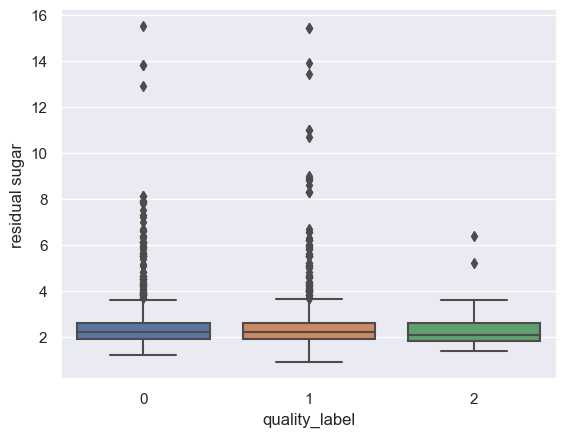

In [180]:
# for normalization i want to check, if there are no outliers
sns.boxplot(data = df_red, x = 'quality_label', y = "residual sugar")

In [181]:
""" ms = MinMaxScaler()
data_sc = ms.fit_transform(df_red["residual sugar"])
data_sc
#image_show(df_red,data_sc, 'min-max normalization') """

' ms = MinMaxScaler()\ndata_sc = ms.fit_transform(df_red["residual sugar"])\ndata_sc\n#image_show(df_red,data_sc, \'min-max normalization\') '

In [182]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1


In [193]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1,0


In [189]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  wine type             4898 non-null   int64  
 13  quality_label         4898 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 535.8+ KB


In [206]:
df =pd.concat([df_red, df_white], axis = 0, ignore_index=True)


In [207]:
df.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality_label
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0,1


In [199]:
df_forlr = df.drop(columns = ["quality", "quality_label"])
df_forlr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


# Start of Machine learning model 

## Step 1 Split the data
### Extra info: White is 0 and Red is 1

In [213]:
# X are the variables used to predict the wine type.
# y is the prediction variable. 

X = df_forlr[["fixed acidity", "citric acid", "residual sugar", 
               "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y = df_forlr["wine type"]

In [246]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   citric acid           6497 non-null   float64
 2   residual sugar        6497 non-null   float64
 3   total sulfur dioxide  6497 non-null   float64
 4   density               6497 non-null   float64
 5   pH                    6497 non-null   float64
 6   sulphates             6497 non-null   float64
 7   alcohol               6497 non-null   float64
dtypes: float64(8)
memory usage: 406.2 KB


In [216]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  wine type             1599 non-null   int64  
 13  quality_label         1599 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 175.0+ KB


In [210]:
X.head()

,fixed acidity,citric acid,residual sugar,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.00,1.9,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.00,2.6,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.04,2.3,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.56,1.9,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.00,1.9,34.0,0.9978,3.51,0.56,9.4


In [214]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: wine type, Length: 6497, dtype: int64

In [220]:
# Split the data to test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head(2))
display(X_test.head(2))
display(y_train.head(2))
display(y_test.head(2))


,fixed acidity,citric acid,residual sugar,total sulfur dioxide,density,pH,sulphates,alcohol
1916,6.6,0.35,7.7,135.0,0.99380,3.19,0.37,10.5
947,8.3,0.48,2.1,12.0,0.99408,3.26,0.62,12.4


,fixed acidity,citric acid,residual sugar,total sulfur dioxide,density,pH,sulphates,alcohol
3103,7.0,0.74,12.8,126.0,0.9942,3.26,0.38,12.2
1419,7.7,0.21,2.2,133.0,0.9956,3.27,0.45,9.9


1916    0
947     1
Name: wine type, dtype: int64

3103    0
1419    1
Name: wine type, dtype: int64

## Normalizse or Standardize the train and test after splitting. 

In [228]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

print(norm)
print(X_train_norm)
print(X_test_norm)

MinMaxScaler()
[[0.23728814 0.28455285 0.10889571 ... 0.35433071 0.08426966 0.40322581]
 [0.38135593 0.3902439  0.02300613 ... 0.40944882 0.2247191  0.70967742]
 [0.33050847 0.00813008 0.02300613 ... 0.52755906 0.19662921 0.61290323]
 ...
 [0.22033898 0.16260163 0.07668712 ... 0.39370079 0.11797753 0.24193548]
 [0.22881356 0.40650407 0.11349693 ... 0.34645669 0.14044944 0.24193548]
 [0.28813559 0.04878049 0.03220859 ... 0.60629921 0.17977528 0.24193548]]
[[0.27118644 0.60162602 0.18711656 ... 0.40944882 0.08988764 0.67741935]
 [0.33050847 0.17073171 0.02453988 ... 0.41732283 0.12921348 0.30645161]
 [0.25423729 0.27642276 0.10429448 ... 0.34645669 0.12359551 0.64516129]
 ...
 [0.23728814 0.28455285 0.01840491 ... 0.35433071 0.29775281 0.70967742]
 [0.23728814 0.30894309 0.13957055 ... 0.44094488 0.19662921 0.22580645]
 [0.30508475 0.2195122  0.22852761 ... 0.12598425 0.11797753 0.11290323]]


In [ ]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.0
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.0
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.0


In [229]:

#正規化を行う関数の定義 create function to do normalization
def min_max_p(p):
  #最小値の計算 caliculate min value
  min_p = p.min()
  #最大値の計算 caliculate max value
  max_p = p.max()
  #正規化の計算caliculate normalization
  min_max_p = (p - min_p) / (max_p - min_p)
  return min_max_p

norm1 = min_max_p(df_red["fixed acidity"])
norm1

0       0.247788
1       0.283186
2       0.283186
3       0.584071
4       0.247788
          ...   
1594    0.141593
1595    0.115044
1596    0.150442
1597    0.115044
1598    0.123894
Name: fixed acidity, Length: 1599, dtype: float64

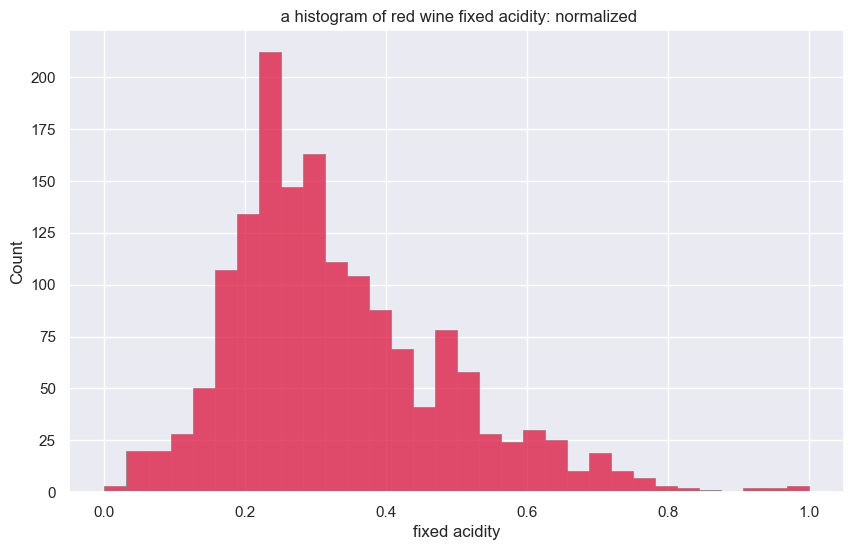

In [232]:
plt.figure(figsize=(10, 6))
plt.title(" a histogram of red wine fixed acidity: normalized")
plt.xlabel("fixed acidity")

sns.histplot(norm1, color='crimson',
         edgecolor='grey', linewidth=0.5)
plt.show() 

In [238]:
# Example
# Fit the model
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [239]:
# Make predictions
pred_lr = lr.predict(X_test)

## Evaluate your model

In [241]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix:")
print(confusion_matrix(y_test, pred_lr))

Confusion matrix:
[[941  18]
 [ 36 305]]


In [242]:
print("Accuracy score:", accuracy_score(y_test, pred_lr))


Accuracy score: 0.9584615384615385


In [244]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_lr, target_names=["Red","White"]))


              precision    recall  f1-score   support

         Red       0.96      0.98      0.97       959
       White       0.94      0.89      0.92       341

    accuracy                           0.96      1300
   macro avg       0.95      0.94      0.95      1300
weighted avg       0.96      0.96      0.96      1300



In [248]:
from sklearn.metrics import cohen_kappa_score


kappa = cohen_kappa_score(pred_lr, y_test)
print("Cohen-Kappa score:", kappa)

Cohen-Kappa score: 0.8908096572792007
